Load the dataset

In [2]:
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

# Read the uploaded file (it will use the first key in the uploaded dict)
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

# Display the first few rows of the dataset
df.head()


Saving house_prices.csv to house_prices.csv


,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


Data Pre-processing

In [3]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Overview of the dataset
print("Dataset shape:", df.shape)
print("\nMissing values per column:\n", df.isnull().sum())

# 2. Drop columns with too many missing values (customize as needed)
threshold = 0.5  # Drop columns with >50% missing values
df = df.loc[:, df.isnull().mean() < threshold]

# 3. Fill numeric columns with median, categorical with mode
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# 4. Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5. Normalize numeric features
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 6. Show cleaned dataset preview
df.head()


Dataset shape: (187531, 21)

Missing values per column:
 Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64


<ipython-input-3-639f9e75ddf4>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-3-639f9e75ddf4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-3-639f9e75ddf4>:17: FutureWarning: A value is trying to be set on a copy o

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,-1.732042,-1.498481,-1.403273,0.101226,-0.055447,1.881061,1.320823,0.0,-1.415544,0.547069,1.076630,-0.535110,0.491944,-2.195631,0.222059,-0.081141
1,-1.732023,-0.638786,-0.299624,1.601250,0.245315,1.881061,1.277988,0.0,0.378898,0.547069,-0.458287,-0.535110,-1.612812,-0.307749,0.222059,-0.081141
2,-1.732005,-0.110231,1.495688,-1.326438,0.388041,1.881061,1.722647,0.0,-1.352335,0.547069,1.076630,-0.535110,-1.612812,-0.307749,0.222059,-0.081141
3,-1.731986,-1.796720,0.203931,-0.602827,-0.054136,1.881061,1.371815,0.0,-1.471730,0.547069,1.076630,-0.535110,0.491944,-2.195631,-1.473813,-0.081141
4,-1.731968,-0.086029,0.892126,-1.285368,0.439100,1.881061,1.521735,0.0,-0.218078,0.547069,1.076630,3.349424,-1.312133,-0.307749,0.222059,-3.892883


Handling Missing Values

In [5]:
# Check current column names (to find any name mismatches)
print("Current columns:")
print(df.columns.tolist())

# Drop columns that exist and have high missing values
columns_to_drop = ['Carpet Area', 'facing', 'overlooking', 'Society', 'Balcony',
                   'Car Parking', 'Ownership', 'Super Area', 'Dimensions', 'Plot Area']

# Drop only columns that are actually in the dataframe
existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=existing_cols_to_drop, inplace=True)

# Drop 'Description' if it exists (mostly text)
if 'Description' in df.columns:
    df.drop(columns=['Description'], inplace=True)

# Handle missing numeric values
if 'Price (in rupees)' in df.columns:
    df['Price (in rupees)'].fillna(df['Price (in rupees)'].median(), inplace=True)
if 'Bathroom' in df.columns:
    df['Bathroom'].fillna(df['Bathroom'].median(), inplace=True)

# Handle missing categorical values
for col in ['Status', 'Floor', 'Transaction', 'Furnishing']:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Normalize numeric features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Final shape and preview
print("Cleaned dataset shape:", df.shape)
df.head()


Current columns:
['Index', 'Title', 'Description', 'Amount(in rupees)', 'Price (in rupees)', 'location', 'Carpet Area', 'Status', 'Floor', 'Transaction', 'Furnishing', 'facing', 'overlooking', 'Bathroom', 'Balcony', 'Ownership']


<ipython-input-5-02cef7b2f740>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price (in rupees)'].fillna(df['Price (in rupees)'].median(), inplace=True)
<ipython-input-5-02cef7b2f740>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

Cleaned dataset shape: (187531, 10)


,Index,Title,Amount(in rupees),Price (in rupees),location,Status,Floor,Transaction,Furnishing,Bathroom
0,-1.732042,-1.498481,0.101226,-0.055447,1.881061,0.0,-1.415544,0.547069,1.076630,-2.195631
1,-1.732023,-0.638786,1.601250,0.245315,1.881061,0.0,0.378898,0.547069,-0.458287,-0.307749
2,-1.732005,-0.110231,-1.326438,0.388041,1.881061,0.0,-1.352335,0.547069,1.076630,-0.307749
3,-1.731986,-1.796720,-0.602827,-0.054136,1.881061,0.0,-1.471730,0.547069,1.076630,-2.195631
4,-1.731968,-0.086029,-1.285368,0.439100,1.881061,0.0,-0.218078,0.547069,1.076630,-0.307749


Exploratory Data Analysis (EDA)

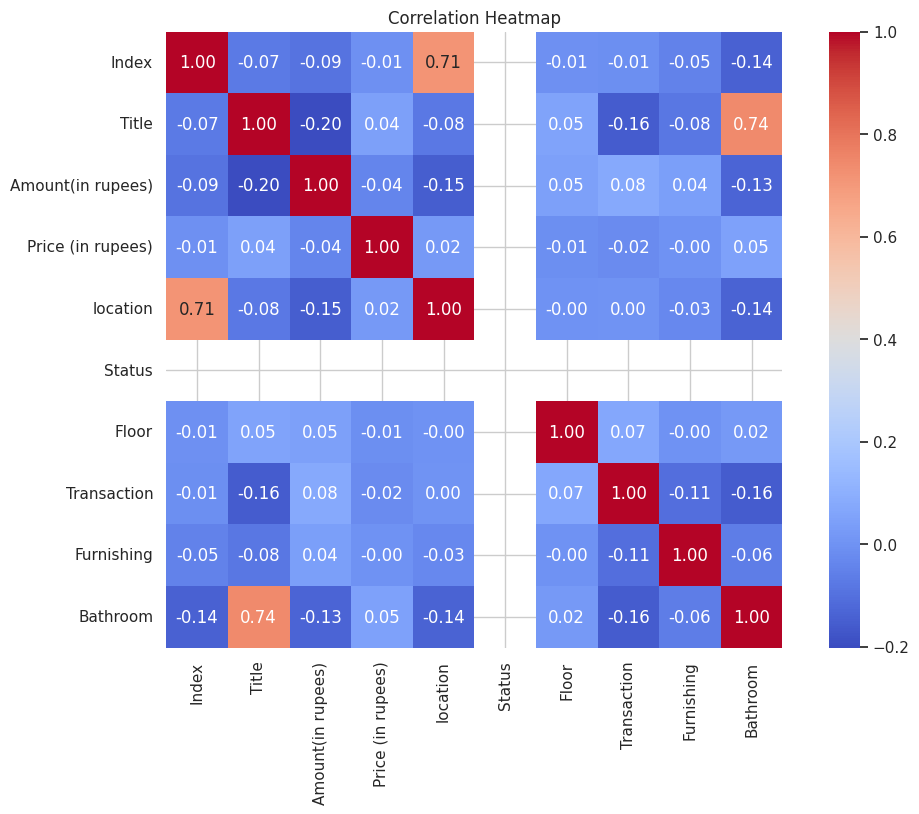

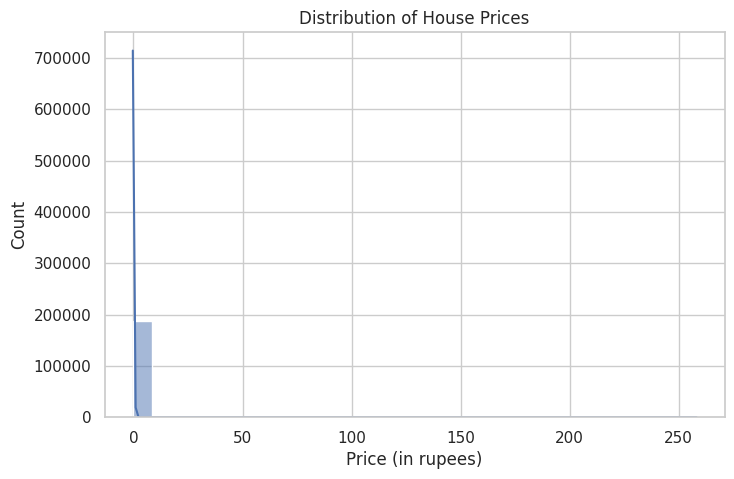

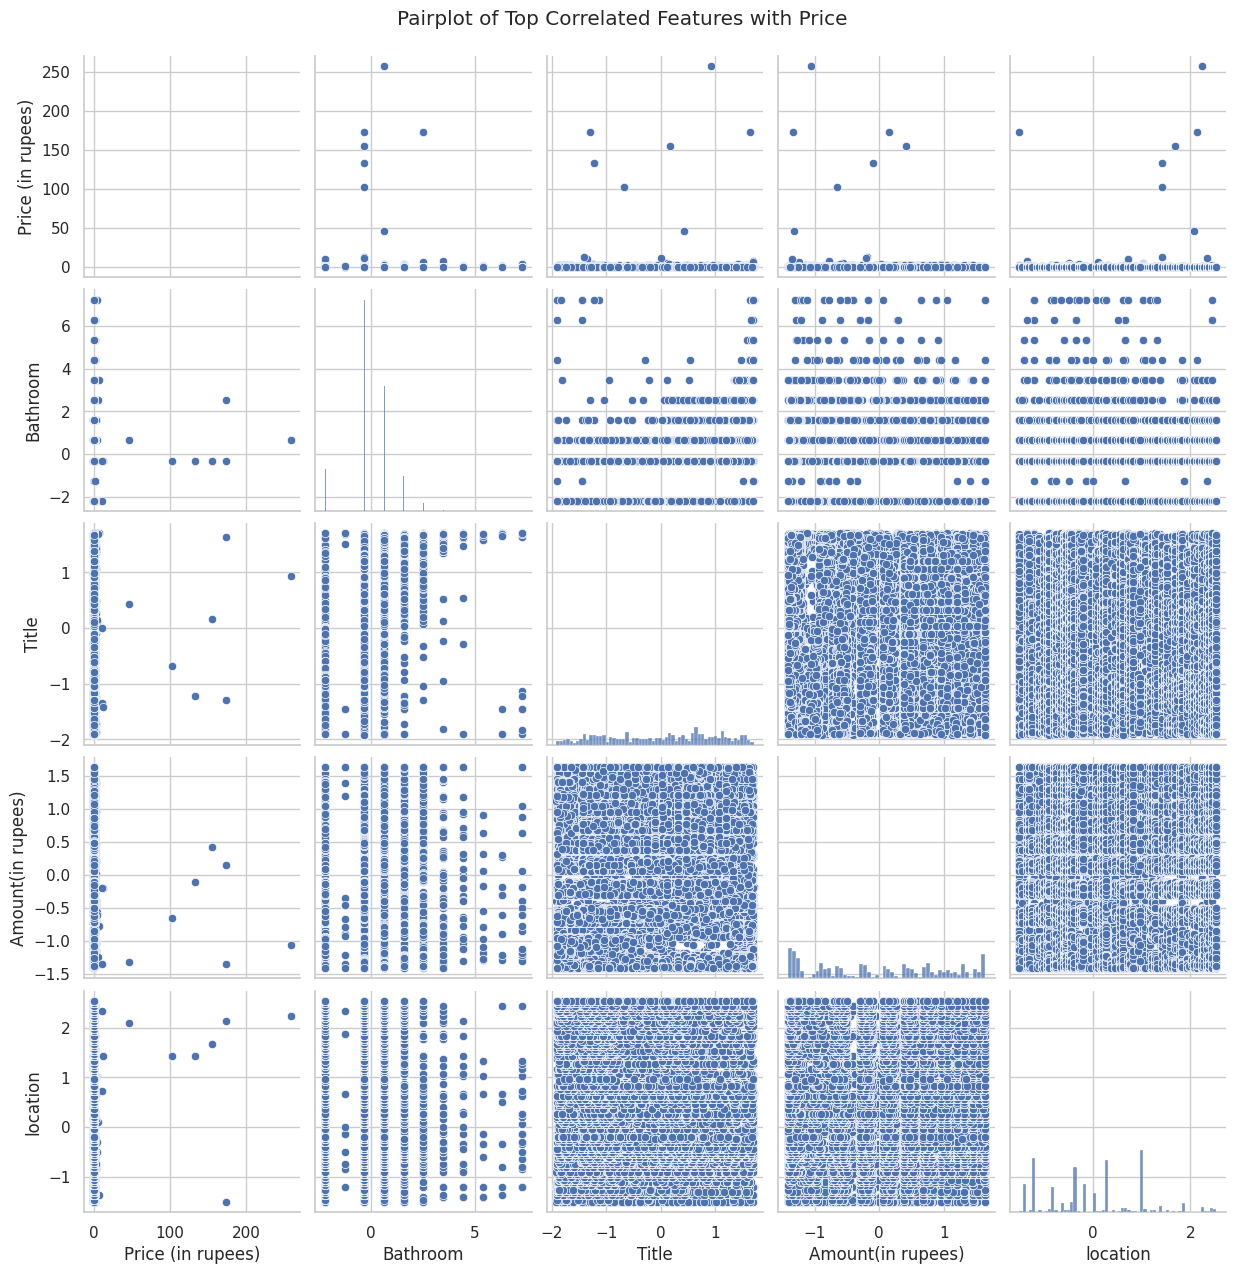

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# 1. Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

# 2. Distribution of Target Variable (House Price)
target_col = 'Price (in rupees)'
if target_col in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[target_col], kde=True, bins=30)
    plt.title("Distribution of House Prices")
    plt.xlabel("Price (in rupees)")
    plt.show()

# 3. Pairplot with Top Features Most Correlated with Price
if target_col in df.columns:
    # Select top 4 features most correlated with price
    top_features = corr[target_col].abs().sort_values(ascending=False).index[1:5]
    sns.pairplot(df[[target_col] + list(top_features)])
    plt.suptitle("Pairplot of Top Correlated Features with Price", y=1.02)
    plt.show()


Model Training & Evaluation Code

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Define X and y
target = 'Price (in rupees)'
X = df.drop(columns=[target])
y = df[target]

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# 4. Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_preds = ridge_model.predict(X_test)

# 5. Polynomial Regression (Degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_preds = poly_model.predict(X_test_poly)

# 6. Evaluation Function
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name}:\nMSE = {mse:.2f}, RMSE = {rmse:.2f}\n")

# 7. Model Evaluations
evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Ridge Regression", y_test, ridge_preds)
evaluate_model("Polynomial Regression (Degree 2)", y_test, poly_preds)


Linear Regression:
MSE = 0.67, RMSE = 0.82

Ridge Regression:
MSE = 0.67, RMSE = 0.82

Polynomial Regression (Degree 2):
MSE = 0.67, RMSE = 0.82



In [9]:
# Example feature selection, exclude target and index columns
feature_cols = [col for col in df.columns if col not in ['Price (in rupees)', 'Index', 'Amount(in rupees)']]

X = df[feature_cols]
y = df['Price (in rupees)']

# Fit scaler only on X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
print("Expected feature columns:", feature_cols)
print("New data keys:", list(new_data.keys()))


Expected feature columns: ['Title', 'location', 'Status', 'Floor', 'Transaction', 'Furnishing', 'Bathroom']
New data keys: ['Carpet Area', 'Property Status', 'Floor', 'Transaction Type', 'Furnishing', 'Facing', 'Overlooking', 'Bathroom Count', 'Balcony Count', 'Property Title', 'Location Description']


In [12]:
new_data = {
    'Title': [0],              # map 'Property Title' value here (e.g., 0)
    'location': [5],           # map 'Location Description' value here (e.g., 5)
    'Status': [1],             # map 'Property Status' value here (e.g., 1)
    'Floor': [3],              # keep 'Floor' as is
    'Transaction': [0],        # map 'Transaction Type' value here
    'Furnishing': [2],         # keep 'Furnishing'
    'Bathroom': [2],           # map 'Bathroom Count' here
}


In [14]:
print("Training feature columns:", list(X.columns))
print("Number of features:", X.shape[1])


Training feature columns: ['Title', 'location', 'Status', 'Floor', 'Transaction', 'Furnishing', 'Bathroom']
Number of features: 7


In [15]:
new_data = {
    'Title': [0],         # encoded value for Title
    'location': [5],      # encoded value for location
    'Status': [1],        # encoded value for Status
    'Floor': [3],         # numeric value or encoded floor
    'Transaction': [0],   # encoded transaction type
    'Furnishing': [2],    # encoded furnishing
    'Bathroom': [2],      # numeric bathroom count
}


In [22]:
print(X.columns)
# Example output:
# Index(['Floor', 'Bathroom', 'Title_Type1', 'Title_Type2', 'location_LocA', 'location_LocB', 'Status_Ready', 'Transaction_Sale', 'Furnishing_Semi-Furnished'], dtype='object')


Index(['Title', 'location', 'Status', 'Floor', 'Transaction', 'Furnishing',
       'Bathroom'],
      dtype='object')


In [4]:
print(df.columns.tolist())


['Index', 'Title', 'Description', 'Amount(in rupees)', 'Price (in rupees)', 'location', 'Carpet Area', 'Status', 'Floor', 'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society', 'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area', 'Dimensions', 'Plot Area']


In [5]:
import pandas as pd

# Load data
df = pd.read_csv('house_prices.csv')

# Check columns
print(df.columns.tolist())

# Define features and target
target_col = 'Price (in rupees)'
X = df.drop(columns=[target_col])
y = df[target_col]

# Now proceed with your train-test split, preprocessing, and modeling


['Index', 'Title', 'Description', 'Amount(in rupees)', 'Price (in rupees)', 'location', 'Carpet Area', 'Status', 'Floor', 'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society', 'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area', 'Dimensions', 'Plot Area']


In [7]:
print(df['Bathroom'].unique())
print(df['Floor'].unique())
print(df['Carpet Area'].unique())


['1' '2' '3' '4' '6' nan '5' '10' '9' '8' '> 10' '7']
['10 out of 11' '3 out of 22' '10 out of 29' '1 out of 3' '20 out of 42'
 '2 out of 7' '4 out of 5' 'Ground out of 7' 'Ground out of 2'
 '3 out of 27' '6 out of 20' '16 out of 24' '8 out of 20' '18 out of 27'
 '2 out of 3' '10 out of 16' '5 out of 7' '20 out of 28' '3 out of 3'
 '3 out of 7' '15 out of 31' '2 out of 28' '27 out of 27' '6 out of 7'
 '5 out of 5' '3 out of 8' '11 out of 17' '9 out of 24' '16 out of 27'
 '14 out of 29' '12 out of 27' '1 out of 27' '2 out of 4' '16 out of 38'
 '3 out of 4' '2 out of 17' '12 out of 28' '3 out of 19' '6 out of 28'
 '1 out of 4' '7 out of 16' '2 out of 2' '1 out of 9' '7 out of 12'
 '10 out of 10' '4 out of 4' '14 out of 17' '21 out of 27' '5 out of 8'
 '7 out of 30' '6 out of 18' '14 out of 28' '3 out of 5' '2 out of 24'
 '1 out of 8' '2 out of 16' '7 out of 7' '4 out of 28' '4 out of 26'
 '1 out of 17' '20 out of 32' '10 out of 25' '15 out of 17' '8 out of 9'
 'Upper Basement out of 9' '

In [8]:
# Extract the first integer from strings like '4 out of 4'
df['Bathroom'] = df['Bathroom'].astype(str).str.extract(r'(\d+)').astype(float)


In [9]:
# Example cleanup for Bathroom column
df['Bathroom'] = df['Bathroom'].astype(str).str.extract(r'(\d+)').astype(float)

# Also check and clean other numeric columns if needed

# Then proceed with train-test split and model pipeline as before


In [10]:
X = df.drop(columns=['Price (in rupees)'])
y = df['Price (in rupees)']


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

# Identify column types
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Define transformers
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

# Create pipeline with preprocessor and model
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [14]:
from sklearn.impute import SimpleImputer

# For numeric columns: fill missing values with mean
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# For categorical columns: fill missing values with most frequent (mode)
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])


In [16]:
print(y_train.isnull().sum())


14094


In [17]:
# Get boolean mask of non-NaN target values
not_nan_mask = y_train.notnull()

# Filter both X_train and y_train
X_train = X_train.loc[not_nan_mask]
y_train = y_train.loc[not_nan_mask]


In [18]:
model_pipeline.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Dimensions' 'Plot Area']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Index', 'Bathroom',
                                                   'Dimensions', 'Plot Area']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Title', 'Description',
                                                   'Amount(in rupees)',
                                                   'location', 'Carpet Area',
                                                   'Status', 'Floor',
                                                   'Transaction', 'Furnishing',
                                                   'facing', 'overlooking',
                                                   'Society', 'Balcony',
                                                   'Car Parking', 'Ownership',
                                                   'Super Area'])])),
                ('regressor', LinearRegression())])

In [19]:
y_pred = model_pipeline.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Dimensions' 'Plot Area']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [21]:
print("NaNs in y_test:", np.isnan(y_test).sum())


NaNs in y_test: 3571


In [22]:
print("NaNs in y_pred:", np.isnan(y_pred).sum())


NaNs in y_pred: 0
